In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('winequality-red.csv')

In [5]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## It is a Supervised Learning Problem because target column have labels

In Un-Supervised Learning there is no labels in data or target colmn

## It is a regression problem because there is continous values in target column

In [6]:
target = wine_dataset['quality']
print("Data type of target:", target.dtype)
print("Number of unique values:", target.nunique())

# Determine if classification or regression
if target.nunique() < 20 and target.dtype == 'object':
    print("This is a classification problem.")
else:
    print("This is a regression problem.")


Data type of target: int64
Number of unique values: 6
This is a regression problem.


### Check the unique values in the last column (target column)

In [8]:
unique_values = wine_dataset['quality'].unique()
print("Unique target values:", unique_values)

Unique target values: [5 6 7 4 8 3]


checking missing values

checking rows and columns

In [12]:
wine_dataset.shape

(1599, 12)

In [11]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualization

In [14]:
# statistical messurement
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


number of values for each dataset

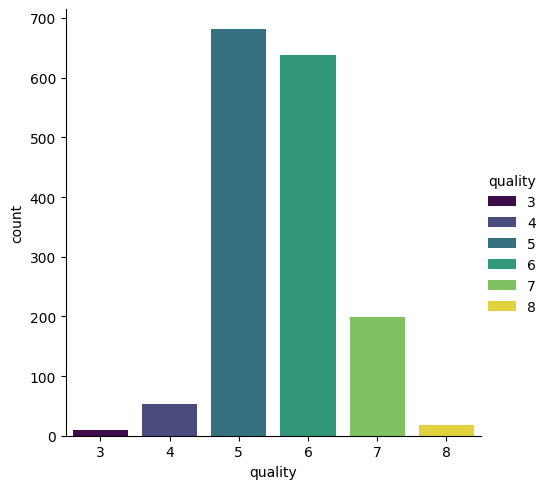

In [ ]:
sns.catplot(x='quality', hue='quality', data=wine_dataset, kind='count', palette='viridis')

### camparing the factors
checking volatile acidity with quality

<Axes: xlabel='quality', ylabel='volatile acidity'>

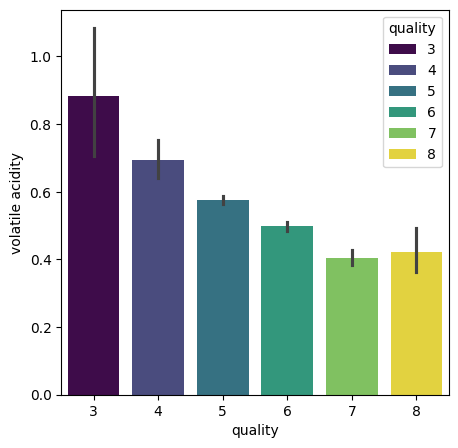

In [27]:
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_dataset, x='quality', y='volatile acidity', hue='quality' ,palette='viridis')

this chart is showing that volatile acidity and quality are inversly proportional because if volatile acidity incearese 
qulality will decrease

citric acid vs Quality

<Axes: xlabel='quality', ylabel='citric acid'>

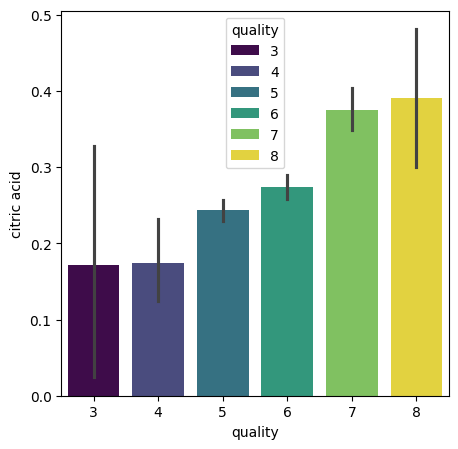

In [28]:
plot = plt.figure(figsize=(5,5))
sns.barplot(data = wine_dataset, x='quality', y = 'citric acid', hue='quality', palette='viridis')

this chart is showing that citric acid and quality are directly proportional because if citric acid is increase qulality
also increase

### checking correlation

In [29]:
correlation = wine_dataset.corr()

<Axes: >

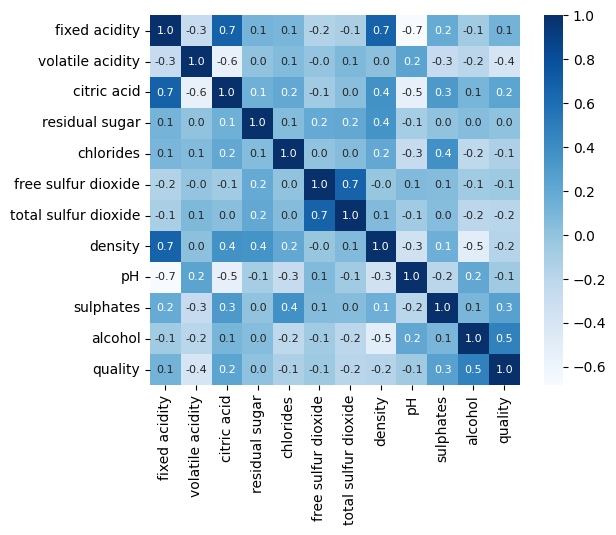

In [41]:
# plot = plt.figure(figsize=(10, 10))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Data Pre-Processing

In [ ]:
X = wine_dataset.drop('quality', axis=1)

Label Binarization or Label Encoding

Because there is 6 valus in target column but by binarizing we will converting this into two values if quality greater 
then 7 it will good if less then 7 it consider to bad quality

In [ ]:
# Y = wine_dataset['quality'].unique()
print("Before Binarization:\n", wine_dataset['quality'].unique())

Before Binarization :
 [5 6 7 4 8 3]


In [56]:
Y = wine_dataset['quality'].apply(lambda value : 1 if value >= 7 else 0)

In [59]:
print("After Binarization:", Y.unique())

After Binarization: [0 1]


Training and Test Split Data 

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [61]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training:

Random Forest Classifier

In [62]:
model = RandomForestClassifier()

In [63]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [64]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [65]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.925


Building a Predictive System

In [66]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


c:\Program Files\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
